# **Importamos las bibliotecas a utilizar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Base de datos**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving propiedadesID.csv to propiedadesID.csv


In [ ]:
import pandas as pd

# Obtener el nombre del archivo cargado
nombre_archivo = list(uploaded.keys())[0]

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(nombre_archivo, delimiter=',', encoding="utf-8")


# Mostrar las primeras filas de los datos para verificar que se hayan cargado correctamente
data.head(10)


,PLATAFORMA,TIPO,ESTADO,VENDEDOR,DIRECCIÓN,BARRIO/ZONA,Mts2 total,Mts2 Cubiertos,AMBIENTES,HABITACIONES,BAÑOS,PRECIO(u$d)
0,argenprop,departamento,0.0,Estudio Yacoub,Saavedra E/ Azcoaga Y José Valdez,Barrio Norte,95.0,60.0,3.0,2.0,1.0,45000.0
1,argenprop,casa,53.0,Remax Tendencia,Edison 1100,Barrio Centro 2,252.0,149.0,4.0,2.0,1.0,63000.0
2,argenprop,casa,35.0,Remax Tendencia,Leoncio De La Barrera 1300,San José Obrero,272.0,81.0,6.0,2.0,1.0,36000.0
3,argenprop,departamento,11.0,Remax Tendencia,Piacenza 55,Barrio Norte,48.0,48.0,2.0,1.0,1.0,30000.0
4,argenprop,casa,36.0,Remax Tendencia,España 2000,Barrio Norte,204.0,128.0,4.0,3.0,1.0,NaN
5,argenprop,casa,35.0,Remax Tendencia,San Luis 84,Provincias Unidas,240.0,160.0,5.0,3.0,1.0,83000.0
6,argenprop,casa,59.0,Remax Tendencia,Almafuerte 1800,Barrio Norte,357.0,68.0,3.0,1.0,1.0,NaN
7,argenprop,departamento,6.0,Remax Tendencia,Mitre 700,Barrio Centro 1,67.0,67.0,3.0,2.0,1.0,65000.0
8,argenprop,casa,40.0,Remax Tendencia,Rivadavia 900,Barrio Centro 2,211.0,172.0,3.0,2.0,1.0,NaN
9,argenprop,departamento,8.0,Remax Tendencia,Almafuerte 1600,Barrio Norte,49.0,49.0,2.0,1.0,1.0,NaN


In [ ]:
# Crear una nueva columna "ID" y asignar un número único a cada fila
data["ID"] = range(1, len(data) + 1)


In [ ]:
# Establecer la columna "ID" como el nuevo índice del DataFrame
data.set_index("ID", inplace=True)

# Mostrar las primeras filas del DataFrame para verificar que se haya creado la columna "ID" correctamente
print(data.head())

   PLATAFORMA          TIPO  ESTADO         VENDEDOR  \
ID                                                     
1   argenprop  departamento     0.0   Estudio Yacoub   
2   argenprop          casa    53.0  Remax Tendencia   
3   argenprop          casa    35.0  Remax Tendencia   
4   argenprop  departamento    11.0  Remax Tendencia   
5   argenprop          casa    36.0  Remax Tendencia   

                            DIRECCIÓN      BARRIO/ZONA  Mts2 total  \
ID                                                                   
1   Saavedra E/ Azcoaga Y José Valdez     Barrio Norte        95.0   
2                         Edison 1100  Barrio Centro 2       252.0   
3          Leoncio De La Barrera 1300  San José Obrero       272.0   
4                         Piacenza 55     Barrio Norte        48.0   
5                         España 2000     Barrio Norte       204.0   

    Mts2 Cubiertos  AMBIENTES  HABITACIONES  BAÑOS  PRECIO(u$d)  
ID                                                

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 1 to 348
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PLATAFORMA      348 non-null    object 
 1   TIPO            348 non-null    object 
 2   ESTADO          177 non-null    float64
 3   VENDEDOR        348 non-null    object 
 4   DIRECCIÓN       341 non-null    object 
 5   BARRIO/ZONA     334 non-null    object 
 6   Mts2 total      305 non-null    float64
 7   Mts2 Cubiertos  278 non-null    float64
 8   AMBIENTES       256 non-null    float64
 9   HABITACIONES    313 non-null    float64
 10  BAÑOS           319 non-null    float64
 11  PRECIO(u$d)     255 non-null    float64
dtypes: float64(7), object(5)
memory usage: 35.3+ KB


# **Análisis de Vendedores**

In [ ]:
# Contar la cantidad de propiedades por vendedor
propiedades_por_vendedor = data.groupby('VENDEDOR').size()

# Mostrar los resultados
print(propiedades_por_vendedor)


VENDEDOR
Agrorosario                       1
Agustin                           1
Ana Rhode                        13
Broker                            7
Carla                             1
Di Nardo                          5
Estudio Yacoub                    2
Ezequiel Thione                   2
Filippetti Kearney                4
Gr Propiedades                    1
Hugo Pena                        51
Mario Ceballos                    8
Mercurio                          1
Mrvt Gestiones Inmobiliarias      4
Pascual                           5
Proin                            56
Remax Tendencia                 134
Romero Y Asociados               43
Ruben Zacco                       2
Spitteler                         1
Tu Espacio                        2
Ugolini Hnos                      2
Urbánica Real Estate              1
Valeria Riesgo                    1
dtype: int64


**Remax Tendencia y Proin** son los vendedores más prominentes en términos de cantidad de propiedades listadas, con 134 y 56 propiedades respectivamente.

**Hugo Pena y Romero y Asociados** también tienen una presencia significativa en el mercado, con 51 y 43 propiedades listadas respectivamente.

Hay varios vendedores con una cantidad moderada de propiedades listadas, como **Di Nardo, Mario Ceballos, Mrvt Gestiones Inmobiliarias, y Pascual**, cada uno con entre 4 y 8 propiedades.

Por otro lado, hay muchos vendedores con una presencia más limitada en el mercado, con solo 1 o 2 propiedades listadas.

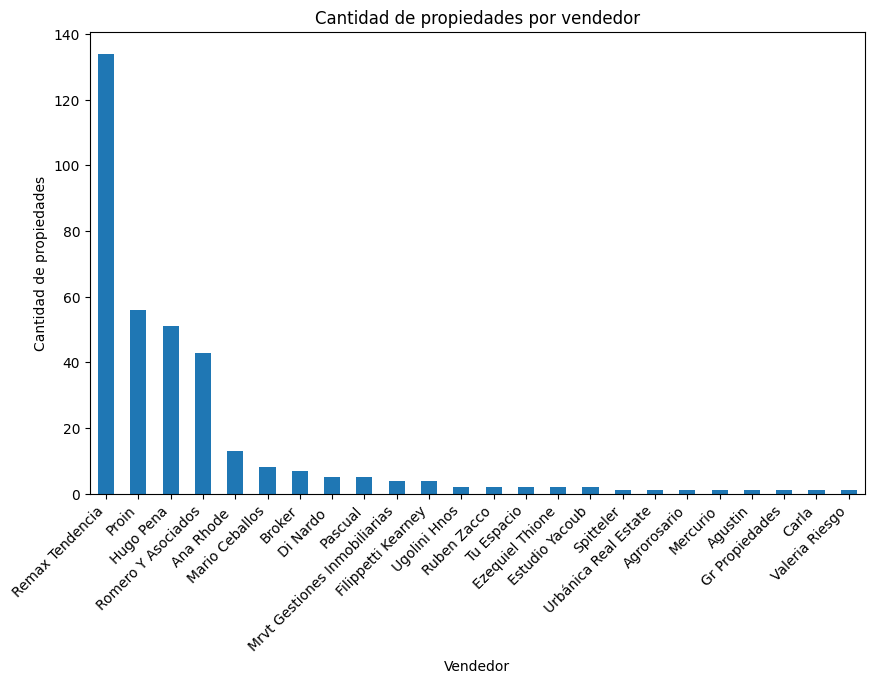

In [ ]:
# Ordenar los vendedores por cantidad de propiedades de mayor a menor
propiedades_por_vendedor_sorted = propiedades_por_vendedor.sort_values(ascending=False)

# Graficar la distribución de propiedades por vendedor ordenada
propiedades_por_vendedor_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de propiedades por vendedor')
plt.xlabel('Vendedor')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45, ha='right')
plt.show()



**IDENTIFICAMOS A LOS PRINCIPALES VENDEDORES:**

In [ ]:
# Identificar a los principales vendedores
principales_vendedores = propiedades_por_vendedor.nlargest(5)  # Obtener los 5 principales vendedores
print(principales_vendedores)


VENDEDOR
Remax Tendencia       134
Proin                  56
Hugo Pena              51
Romero Y Asociados     43
Ana Rhode              13
dtype: int64


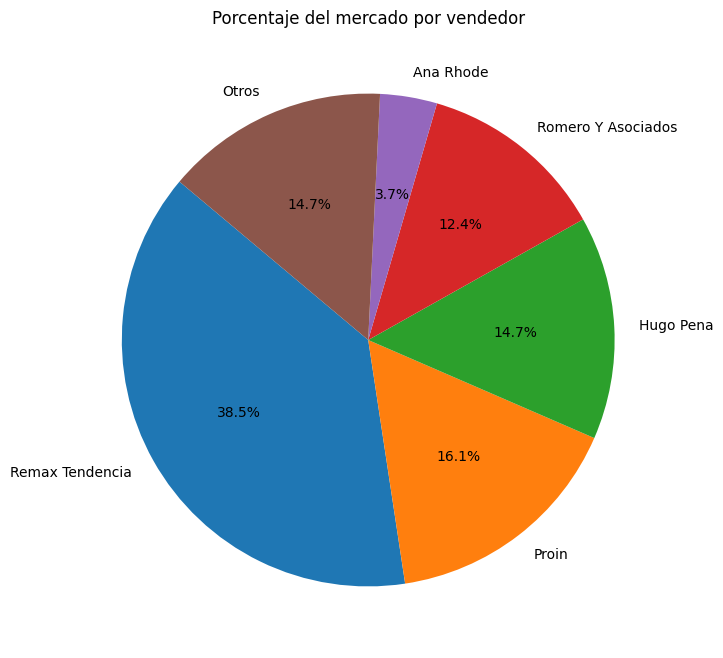

In [ ]:
# Obtener los cinco principales vendedores
top_vendedores = propiedades_por_vendedor.nlargest(5)

# Calcular la cantidad de propiedades de los cinco principales vendedores
propiedades_top_vendedores = top_vendedores.sum()

# Calcular la cantidad de propiedades del resto de los vendedores
propiedades_resto = propiedades_por_vendedor.sum() - propiedades_top_vendedores

# Construir un diccionario con los cinco principales vendedores y la categoría "Otros"
vendedores_dict = top_vendedores.to_dict()
vendedores_dict['Otros'] = propiedades_resto

# Crear una nueva serie a partir del diccionario
propiedades_por_vendedor_extended = pd.Series(vendedores_dict)

# Crear un gráfico de torta con porcentaje del mercado
plt.figure(figsize=(8, 8))
propiedades_por_vendedor_extended.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje del mercado por vendedor')
plt.ylabel('')
plt.show()



# **Análisis tipo de propiedad global**

In [ ]:
# Contar la cantidad de cada tipo de propiedad
propiedades_por_tipo = data['TIPO'].value_counts()

# Mostrar los resultados
print(propiedades_por_tipo)


TIPO
casa            227
departamento     90
casa quinta      18
galpón           11
cochera           1
casa              1
Name: count, dtype: int64


In [ ]:
# Corregir los tipos de propiedad duplicados o mal etiquetados
data.loc[data['TIPO'] == 'casa ', 'TIPO'] = 'casa'  # Corregir "casa " a "casa"

# Contar nuevamente la cantidad de cada tipo de propiedad
propiedades_por_tipo = data['TIPO'].value_counts()

# Mostrar los resultados actualizados
print(propiedades_por_tipo)


TIPO
casa            228
departamento     90
casa quinta      18
galpón           11
cochera           1
Name: count, dtype: int64


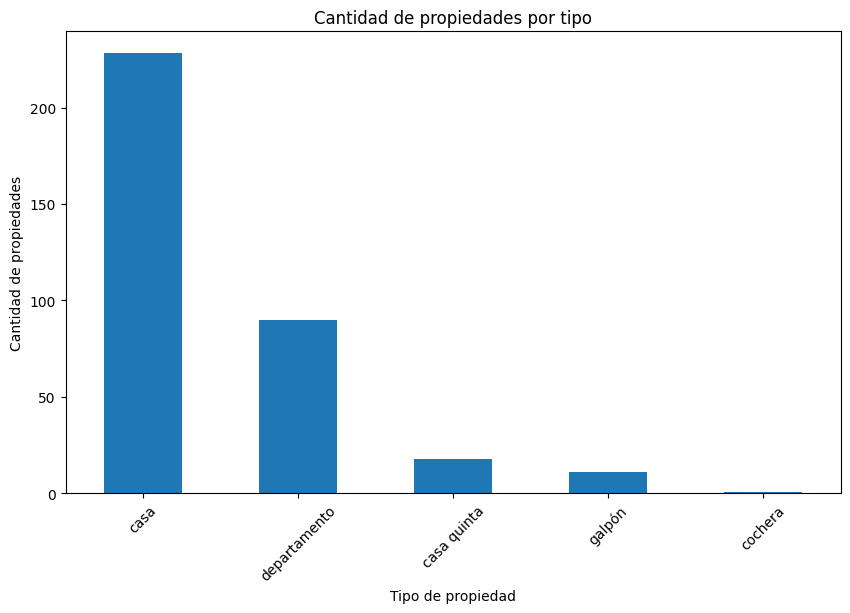

In [ ]:
# Graficar la distribución de los tipos de propiedades
plt.figure(figsize=(10, 6))
propiedades_por_tipo.plot(kind='bar')
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45)
plt.show()


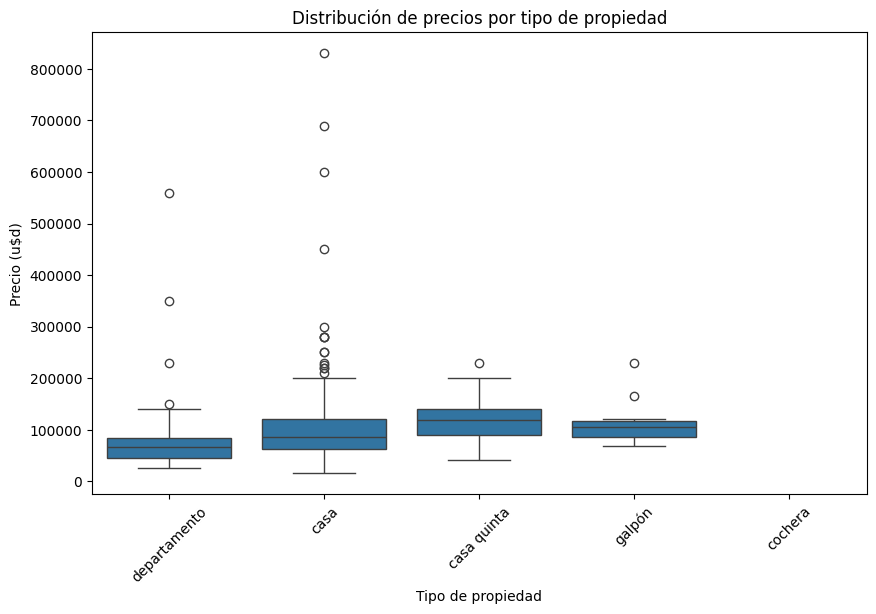

In [ ]:
# Crear un gráfico de caja para cada tipo de propiedad
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO', y='PRECIO(u$d)', data=data)
plt.title('Distribución de precios por tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio (u$d)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Elimina filas con valores nulos en las variables relevantes (HABITACIONES, BAÑOS, AMBIENTES)
data_sin_nulos_caracteristicas = data.dropna(subset=['HABITACIONES', 'BAÑOS', 'AMBIENTES'])

# Cuenta la cantidad de propiedades de cada tipo con una cantidad específica de habitaciones
habitaciones_por_tipo_propiedad = data_sin_nulos_caracteristicas.groupby(['TIPO', 'HABITACIONES']).size()

# Cuenta la cantidad de propiedades de cada tipo con una cantidad específica de baños
baños_por_tipo_propiedad = data_sin_nulos_caracteristicas.groupby(['TIPO', 'BAÑOS']).size()

# Cuenta la cantidad de propiedades de cada tipo con una cantidad específica de ambientes
ambientes_por_tipo_propiedad = data_sin_nulos_caracteristicas.groupby(['TIPO', 'AMBIENTES']).size()

# Muestra los resultados
print("Cantidad de propiedades por tipo con una cantidad específica de habitaciones:")
print(habitaciones_por_tipo_propiedad)
print("\nCantidad de propiedades por tipo con una cantidad específica de baños:")
print(baños_por_tipo_propiedad)
print("\nCantidad de propiedades por tipo con una cantidad específica de ambientes:")
print(ambientes_por_tipo_propiedad)


Cantidad de propiedades por tipo con una cantidad específica de habitaciones:
TIPO          HABITACIONES
casa          1.0             11
              2.0             79
              3.0             57
              4.0             13
              5.0              1
              6.0              1
casa quinta   1.0              1
              2.0              1
              3.0              2
              5.0              2
departamento  1.0             40
              2.0             32
              3.0              6
              4.0              2
galpón        2.0              1
              3.0              1
dtype: int64

Cantidad de propiedades por tipo con una cantidad específica de baños:
TIPO          BAÑOS
casa          1.0      87
              2.0      53
              3.0      15
              4.0       6
              6.0       1
casa quinta   1.0       2
              2.0       2
              3.0       1
              4.0       1
departamento  1.0      70
  

**GRAFICAMOS LA CANTIDAD DE PROPIEDADES DE CADA TIPO, DE ACUERDO A LA CANTIDAD DE "HABITACIONES, BAÑOS, AMBIENTES" QUE TENGAN**

Cantidad de casas, departamentos, casa quintas publicadas, con respecto a la cantidad de **HABITACIONES**:

<Figure size 1000x600 with 0 Axes>

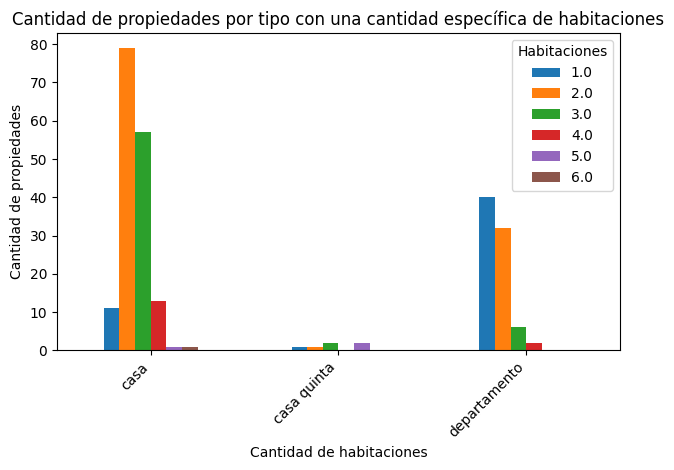

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos excluyendo el tipo de propiedad "galpón"
habitaciones_por_tipo_propiedad_filtrado = habitaciones_por_tipo_propiedad.drop('galpón', level=0)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
habitaciones_por_tipo_propiedad_filtrado.unstack().plot(kind='bar')
plt.title('Cantidad de propiedades por tipo con una cantidad específica de habitaciones')
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Habitaciones')
plt.tight_layout()
plt.show()


Cantidad de casas, departamentos, casa quintas publicadas, con respecto a la cantidad de **BAÑOS**:

<Figure size 1000x600 with 0 Axes>

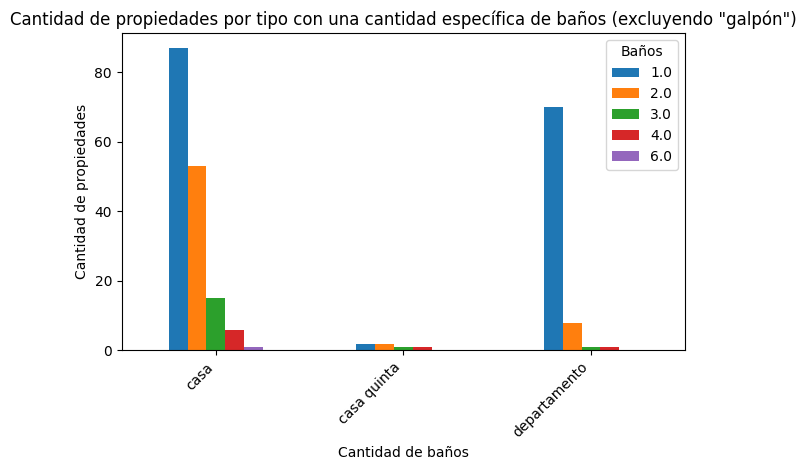

In [ ]:
# Filtrar los datos excluyendo el tipo de propiedad "galpón"
baños_por_tipo_propiedad_filtrado = baños_por_tipo_propiedad.drop('galpón', level=0)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
baños_por_tipo_propiedad_filtrado.unstack().plot(kind='bar')
plt.title('Cantidad de propiedades por tipo con una cantidad específica de baños (excluyendo "galpón")')
plt.xlabel('Cantidad de baños')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Baños')
plt.tight_layout()
plt.show()


Cantidad de casas, departamentos, casa quintas publicadas, con respecto a la cantidad de **AMBIENTES**:

<Figure size 1000x600 with 0 Axes>

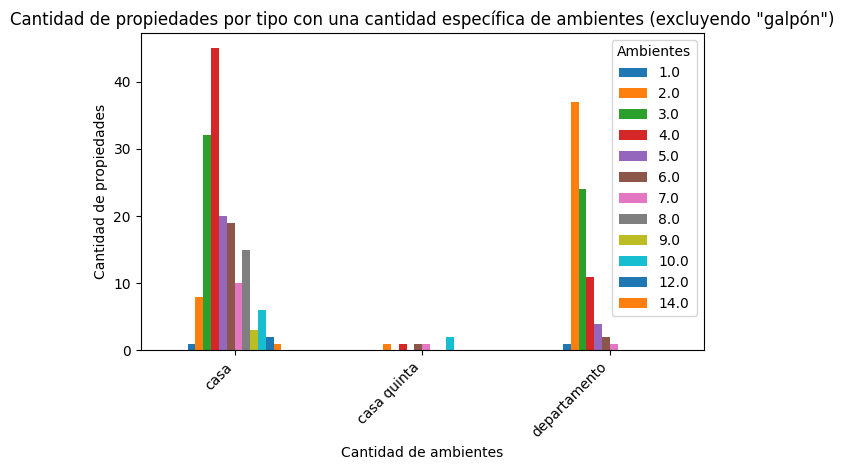

In [ ]:
# Filtrar los datos excluyendo el tipo de propiedad "galpón"
ambientes_por_tipo_propiedad_filtrado = ambientes_por_tipo_propiedad.drop('galpón', level=0)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ambientes_por_tipo_propiedad_filtrado.unstack().plot(kind='bar')
plt.title('Cantidad de propiedades por tipo con una cantidad específica de ambientes (excluyendo "galpón")')
plt.xlabel('Cantidad de ambientes')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ambientes')
plt.tight_layout()
plt.show()


# **Análisis de la ubicación de la propiedad (Barrio)**

In [ ]:
# Contar la cantidad de propiedades por barrio/zona
propiedades_por_barrio = data['BARRIO/ZONA'].value_counts()

# Mostrar los resultados
print(propiedades_por_barrio)



BARRIO/ZONA
Barrio Centro 1         74
Barrio Centro 2         49
Barrio Centro 3         34
Barrio Norte            25
Bernardino Rivadavia    24
General Belgrano        16
Malvinas Argentinas     12
General San Martín      11
San José Obrero         11
Ciudad Nueva            11
San Cayetano            10
Tiro Federal             8
M.M De Guemes            8
Villa Casey              7
Provincias Unidas        6
Los Pinos                5
Los Robles               5
Barrio San Vicente       4
Alejandro Gutierrez      3
Pedro Iturbide           3
Santa Rosa               2
Barrio Centro 1          2
Barrio De La Carne       2
Cumelén                  1
El Cruce                 1
Name: count, dtype: int64


In [ ]:
# Sumar las propiedades adicionales a la entrada existente de "Barrio Centro 1" en el DataFrame original "data"
data.loc[data['BARRIO/ZONA'] == 'Barrio Centro 1 ', 'BARRIO/ZONA'] = 'Barrio Centro 1'

# Mostrar los resultados actualizados
print(data['BARRIO/ZONA'].value_counts())



BARRIO/ZONA
Barrio Centro 1         76
Barrio Centro 2         49
Barrio Centro 3         34
Barrio Norte            25
Bernardino Rivadavia    24
General Belgrano        16
Malvinas Argentinas     12
Ciudad Nueva            11
San José Obrero         11
General San Martín      11
San Cayetano            10
Tiro Federal             8
M.M De Guemes            8
Villa Casey              7
Provincias Unidas        6
Los Robles               5
Los Pinos                5
Barrio San Vicente       4
Alejandro Gutierrez      3
Pedro Iturbide           3
Santa Rosa               2
Barrio De La Carne       2
Cumelén                  1
El Cruce                 1
Name: count, dtype: int64


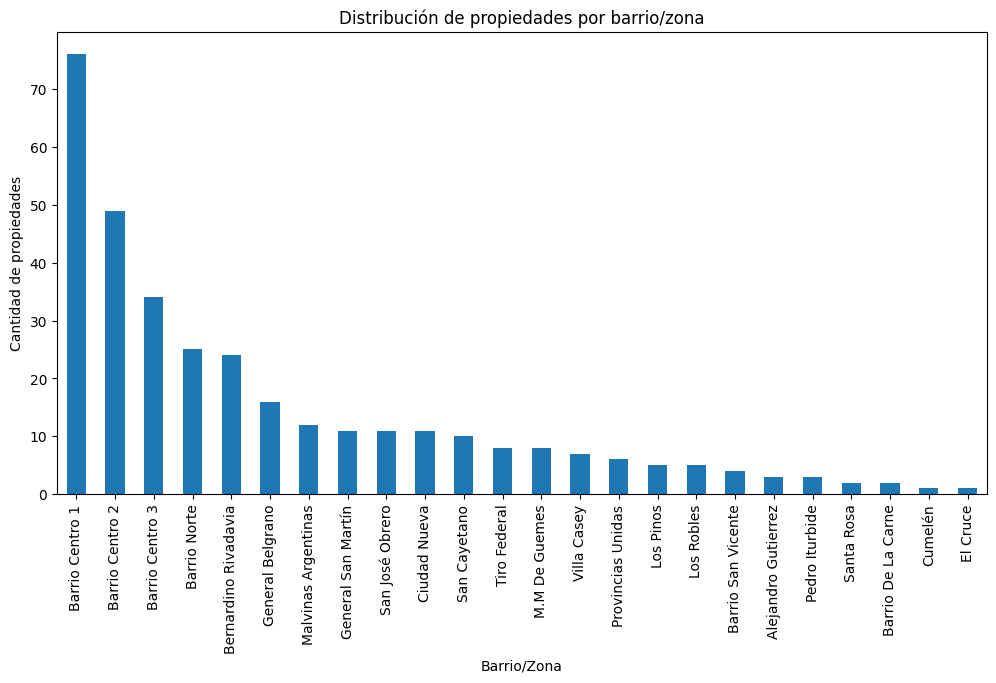

In [ ]:
# Visualizar la distribución de propiedades por barrio/zona mediante un gráfico de barras
plt.figure(figsize=(12, 6))
propiedades_por_barrio.plot(kind='bar')
plt.title('Distribución de propiedades por barrio/zona')
plt.xlabel('Barrio/Zona')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=90)
plt.show()


Inicialmente vimos la distribución total de las propiedades según el barrio/zona. Ahora veamos **qué tipo de propiedad** se ofrece en cada lugar.

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por barrio/zona y tipo de propiedad, y contar la cantidad de propiedades en cada grupo
propiedades_por_barrio_tipo = data.groupby(['BARRIO/ZONA', 'TIPO']).size()

# Mostrar los resultados
print(propiedades_por_barrio_tipo)




BARRIO/ZONA           TIPO        
Alejandro Gutierrez   casa             3
Barrio Centro 1       casa            41
                      departamento    34
                      galpón           1
Barrio Centro 2       casa            30
                      casa quinta      1
                      cochera          1
                      departamento    15
                      galpón           2
Barrio Centro 3       casa            28
                      departamento     6
Barrio De La Carne    casa             1
                      galpón           1
Barrio Norte          casa            16
                      departamento     8
                      galpón           1
Barrio San Vicente    casa             2
                      departamento     1
                      galpón           1
Bernardino Rivadavia  casa            14
                      casa quinta      1
                      departamento     7
                      galpón           2
Ciudad Nueva          

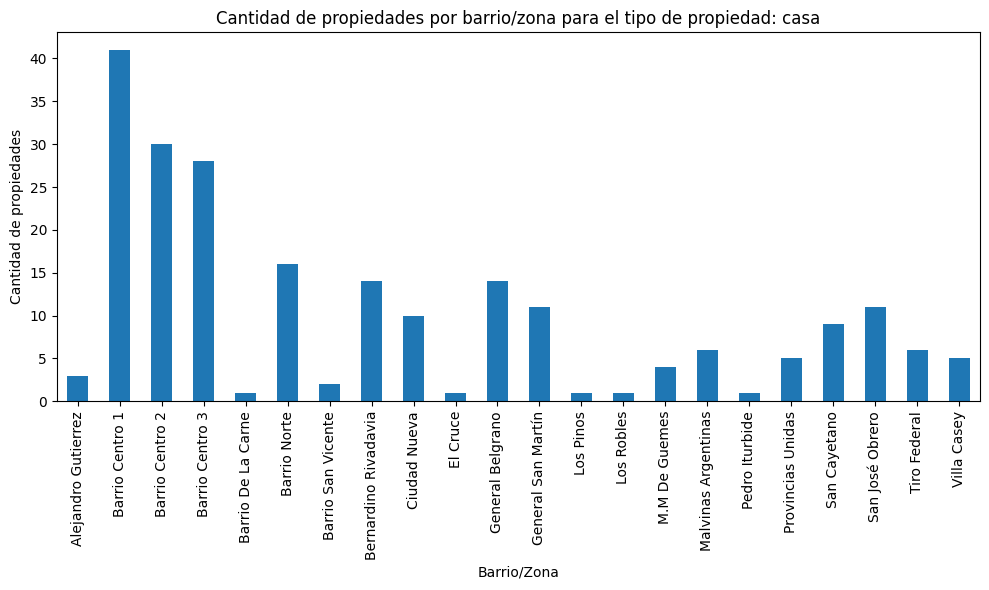

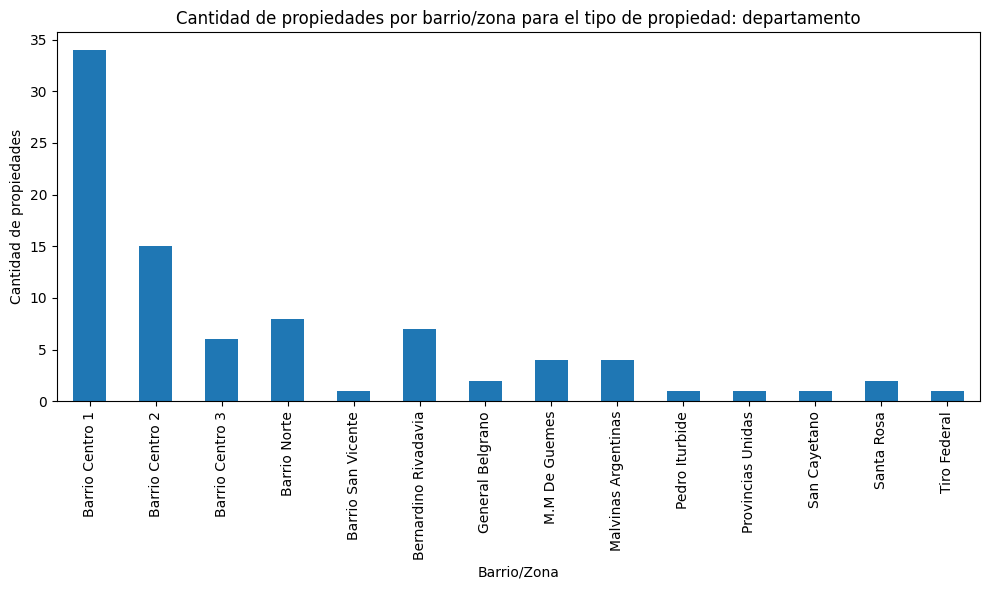

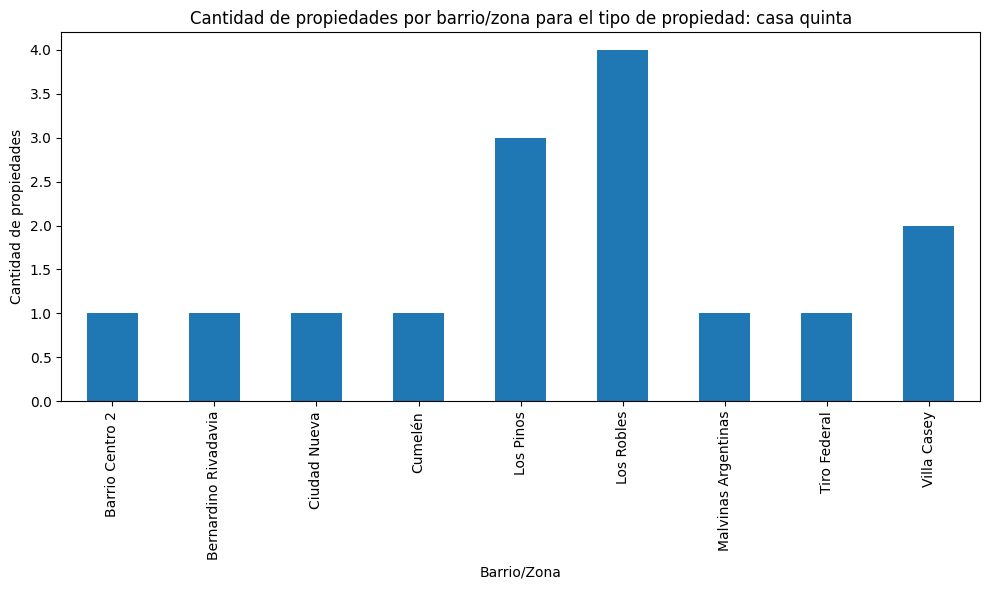

In [ ]:
# Filtrar los datos excluyendo los tipos de propiedad "galpón" y "cochera"
tipos_excluidos = ['galpón', 'cochera']
propiedades_por_barrio_tipo_filtrado = propiedades_por_barrio_tipo.drop(tipos_excluidos, level=1)

# Obtener la lista de tipos de propiedad
tipos_propiedad = propiedades_por_barrio_tipo_filtrado.index.get_level_values('TIPO').unique()

# Crear un gráfico separado para cada tipo de propiedad
for tipo in tipos_propiedad:
    try:
        # Obtener los datos para el tipo de propiedad actual
        datos_tipo_actual = propiedades_por_barrio_tipo_filtrado.loc[:, tipo]

        # Crear el gráfico de barras para el tipo de propiedad actual
        plt.figure(figsize=(10, 6))
        datos_tipo_actual.plot(kind='bar')
        plt.title('Cantidad de propiedades por barrio/zona para el tipo de propiedad: ' + tipo)
        plt.xlabel('Barrio/Zona')
        plt.ylabel('Cantidad de propiedades')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"No hay propiedades del tipo {tipo}")


# **Análisis de la variable PRECIO**

Vamos a realizar un análisis completo sobre esta variable, considerándola factor clave.

In [ ]:
# Estadísticas descriptivas de la variable PRECIO
precio_stats = data['PRECIO(u$d)'].describe()

# Mostrar las estadísticas descriptivas
print(precio_stats)


count       255.000000
mean     105227.678431
std       93546.483641
min       15000.000000
25%       59250.000000
50%       82000.000000
75%      115000.000000
max      830000.000000
Name: PRECIO(u$d), dtype: float64


*   Hay un total de 255 valores válidos para la variable PRECIO.

*   La media (promedio) del precio es aproximadamente $105,227.68.

*   La desviación estándar del precio es aproximadamente $93,546.48, lo que indica la dispersión de los precios alrededor de la media.


*   El precio mínimo es $15,000 y el precio máximo es $830,000.


*   El 25% de los precios están por debajo de $59,250.

*   La mediana (50%) del precio es $82,000, lo que significa que la mitad de las propiedades tienen un precio inferior a este valor.

*   El 75% de los precios están por debajo de $115,000.

Ahora, vemos qué podemos hacer con estos valores. **BUSCAMOS VALORES EXTREMOS O ATÍPICOS** QUE A LA HORA DE UN ANÁLISIS GLOBAL PUEDEN HACER RUIDO.













En primer lugar, separamos los precios de acuerdo el **TIPO DE PROPIEDAD**:

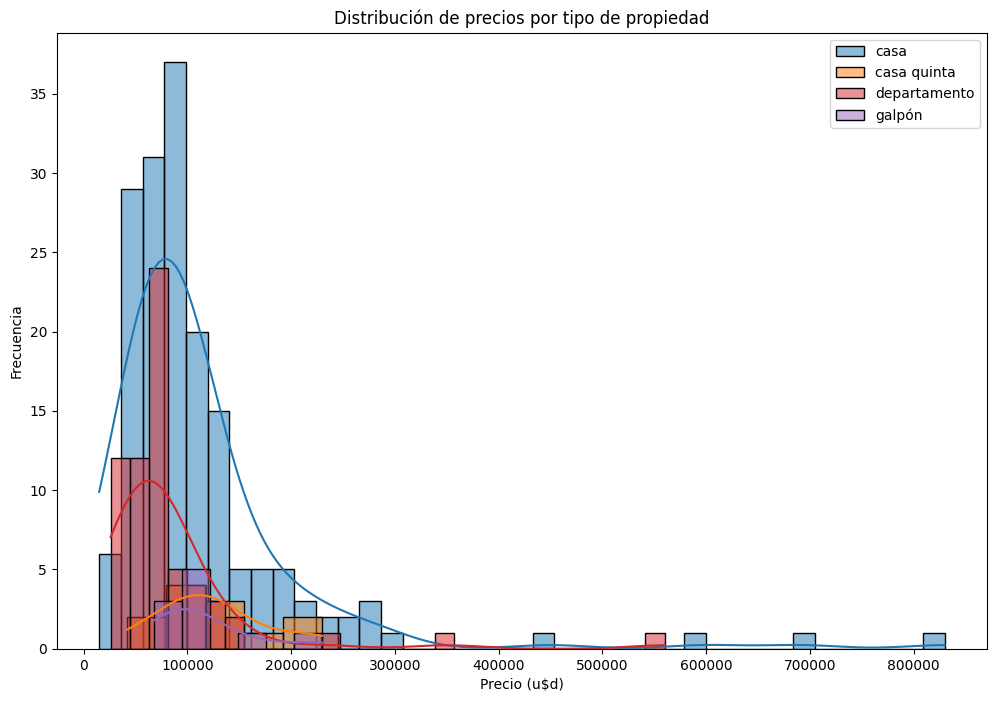

In [ ]:
import seaborn as sns

# Separar los precios según el tipo de propiedad
precios_por_tipo_propiedad = {}
for tipo_propiedad, datos_tipo_propiedad in data.groupby('TIPO')['PRECIO(u$d)']:
    precios_por_tipo_propiedad[tipo_propiedad] = datos_tipo_propiedad.dropna()

# Visualizar la distribución de precios para cada tipo de propiedad
plt.figure(figsize=(12, 8))
for tipo_propiedad, precios in precios_por_tipo_propiedad.items():
    sns.histplot(precios, kde=True, label=tipo_propiedad)
plt.title('Distribución de precios por tipo de propiedad')
plt.xlabel('Precio (u$d)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
# Calcular estadísticas descriptivas para cada tipo de propiedad
estadisticas_por_tipo_propiedad = {}
for tipo_propiedad, precios in precios_por_tipo_propiedad.items():
    estadisticas = precios.describe()
    estadisticas_por_tipo_propiedad[tipo_propiedad] = estadisticas

# Crear una tabla de pandas para mostrar las estadísticas descriptivas
tabla_estadisticas = pd.concat(estadisticas_por_tipo_propiedad, axis=1)
tabla_estadisticas.columns.names = ['Estadísticas']  # Asignar nombre al nivel de las columnas
tabla_estadisticas = tabla_estadisticas.T

# Mostrar la tabla de estadísticas
print("Distribución de precios por tipo de propiedad:")
print(tabla_estadisticas)



Distribución de precios por tipo de propiedad:
              count           mean            std      min      25%       50%  \
Estadísticas                                                                    
casa          168.0  111949.404762  102139.311930  15000.0  62250.0   85000.0   
casa quinta    12.0  123583.333333   52290.201295  42000.0  88750.0  118500.0   
cochera         0.0            NaN            NaN      NaN      NaN       NaN   
departamento   65.0   82793.200000   77464.121693  26000.0  45000.0   67000.0   
galpón         10.0  116100.000000   48155.881145  68000.0  86000.0  105000.0   

                   75%       max  
Estadísticas                      
casa          121250.0  830000.0  
casa quinta   140000.0  230000.0  
cochera            NaN       NaN  
departamento   83000.0  560000.0  
galpón        117500.0  230000.0  


In [ ]:
# Definir una función para encontrar valores atípicos para un DataFrame dado
def encontrar_valores_atipicos(datos):
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.01 * IQR
    umbral_superior = Q3 + 1.01 * IQR
    return datos[(datos < umbral_inferior) | (datos > umbral_superior)]

# Encontrar valores atípicos para cada tipo de propiedad
valores_atipicos_por_tipo_propiedad = {}
for tipo_propiedad, precios in precios_por_tipo_propiedad.items():
    valores_atipicos = encontrar_valores_atipicos(precios)
    valores_atipicos_por_tipo_propiedad[tipo_propiedad] = valores_atipicos

# Mostrar los valores atípicos para cada tipo de propiedad
for tipo_propiedad, valores_atipicos in valores_atipicos_por_tipo_propiedad.items():
    print(f"Valores atípicos para '{tipo_propiedad}':")
    print(valores_atipicos)
    print()


Valores atípicos para 'casa':
ID
15     280000.0
75     230000.0
81     225000.0
119    830000.0
132    690000.0
147    190000.0
182    300000.0
225    220000.0
243    220000.0
257    450000.0
260    195000.0
293    600000.0
300    250000.0
324    280000.0
325    280000.0
326    210000.0
327    200000.0
328    195000.0
338    250000.0
341    190000.0
Name: PRECIO(u$d), dtype: float64

Valores atípicos para 'casa quinta':
ID
133    230000.0
235    200000.0
Name: PRECIO(u$d), dtype: float64

Valores atípicos para 'cochera':
Series([], Name: PRECIO(u$d), dtype: float64)

Valores atípicos para 'departamento':
ID
78     230000.0
144    150000.0
157    136350.0
174    560000.0
175    350000.0
248    140000.0
291    130000.0
Name: PRECIO(u$d), dtype: float64

Valores atípicos para 'galpón':
ID
91     230000.0
139    165000.0
Name: PRECIO(u$d), dtype: float64



**Ahora, veamos la comparativa de precios con respecto al barrio.**

Vamos a realizar dos análisis:

1. Calcular el precio promedio del tipo de propiedad en cada barrio/zona.

2. Calcular el precio del metro cuadrado (precio por m^2) de acuerdo al barrio/zona.

Para calcular el precio promedio del tipo de propiedad en cada barrio/zona, primero agruparemos los datos por tipo de propiedad y luego por barrio/zona. Luego, calcularemos el precio promedio para cada grupo.

Es una buena idea realizar estos análisis **sin tener en cuenta los valores atípicos** para obtener una imagen más precisa y representativa de la distribución de los precios por tipo de propiedad y por barrio/zona.

In [ ]:
# Filtrar los datos para excluir los valores atípicos
data_sin_atipicos = data[~data.index.isin(valores_atipicos_por_tipo_propiedad.values())]

# Calcular el precio promedio del tipo de propiedad en cada barrio/zona
precio_promedio_por_tipo_y_barrio_sin_atipicos = data_sin_atipicos.groupby(['TIPO', 'BARRIO/ZONA'])['PRECIO(u$d)'].mean()

# Mostrar el resultado
print("Precio promedio del tipo de propiedad en cada barrio/zona (sin valores atípicos):")
print(precio_promedio_por_tipo_y_barrio_sin_atipicos)
print()



Precio promedio del tipo de propiedad en cada barrio/zona (sin valores atípicos):
TIPO          BARRIO/ZONA         
casa          Alejandro Gutierrez      23500.000000
              Barrio Centro 1         185191.176471
              Barrio Centro 2         131000.000000
              Barrio Centro 3         106333.333333
              Barrio De La Carne                NaN
              Barrio Norte             90111.111111
              Barrio San Vicente       70500.000000
              Bernardino Rivadavia    113450.000000
              Ciudad Nueva             72000.000000
              El Cruce                 78000.000000
              General Belgrano         83900.000000
              General San Martín       80277.777778
              Los Pinos                35000.000000
              Los Robles                        NaN
              M.M De Guemes            66666.666667
              Malvinas Argentinas      48400.000000
              Pedro Iturbide           47000.000000

Ordenamos los **barrios de más caros a más baratos**, teniendo en cuenta el tipo de propiedad:

In [ ]:
# Ordenar los barrios por precio promedio del tipo de propiedad, de más caro a más barato
barrios_mas_caros_por_tipo_propiedad = precio_promedio_por_tipo_y_barrio_sin_atipicos.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))

# Mostrar los resultados
print("Barrios de más caros a más baratos para cada tipo de propiedad:")
print(barrios_mas_caros_por_tipo_propiedad)


Barrios de más caros a más baratos para cada tipo de propiedad:
TIPO          TIPO          BARRIO/ZONA         
casa          casa          Barrio Centro 1         185191.176471
                            Barrio Centro 2         131000.000000
                            Bernardino Rivadavia    113450.000000
                            Barrio Centro 3         106333.333333
                            San Cayetano            106000.000000
                            San José Obrero         101777.777778
                            Barrio Norte             90111.111111
                            Provincias Unidas        84750.000000
                            General Belgrano         83900.000000
                            General San Martín       80277.777778
                            El Cruce                 78000.000000
                            Ciudad Nueva             72000.000000
                            Barrio San Vicente       70500.000000
                            M